# Aug ??st, 2021

**Motivation**: fig 2 <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Mice

In [2]:
svinet_props = {
    'task': 'rest',
    'mode': 'bold',
    'metric': 'pearson',
    'match_metric': 'euclidean',
    'graph_type': 'real',
}
mice = Mice(Config(128))
mice.combine_dfs(svinet_props.get('task', 'rest'), full=True)

In [3]:
k = 12
p = 20
svinet = SVINET(mice, k, p, 'sub-SLC')
group_dir = get_svinet_group_dir(
    results_dir=mice.cfg.results_dir,
    k=k,
    p=p,
    graph_type=svinet_props.get('graph_type', 'real'),
)
print(group_dir)

current expt: 'p20'

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/gr
oup_results/real-p20-k12

In [4]:
from register.atlas import get_subtree, included_intersect_tables
tree = load_bg_atlas().hierarchy

allen mouse atlas (res. 100um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )


In [5]:
_ = get_subtree(
    tree,
    base_id=8,
    n_levels=3,
    show=True,
)

grey (8)
├── BS (343)
│   ├── HB (1065)
│   ├── IB (1129)
│   └── MB (313)
├── CB (512)
│   ├── CBN (519)
│   └── CBX (528)
└── CH (567)
    ├── CNU (623)
    └── CTX (688)



In [6]:
_ = get_subtree(
    tree,
    base_id=567,
    n_levels=4,
    show=True,
)

CH (567)
├── CNU (623)
│   ├── PAL (803)
│   │   ├── PALc (809)
│   │   ├── PALd (818)
│   │   ├── PALm (826)
│   │   └── PALv (835)
│   └── STR (477)
│       ├── LSX (275)
│       ├── STRd (485)
│       ├── STRv (493)
│       └── sAMY (278)
└── CTX (688)
    ├── CTXpl (695)
    │   ├── HPF (1089)
    │   ├── Isocortex (315)
    │   └── OLF (698)
    └── CTXsp (703)
        ├── BLA (295)
        ├── BMA (319)
        ├── CLA (583)
        ├── EP (942)
        ├── LA (131)
        └── PA (780)



In [7]:
cortex_subtree, base_lvl = get_subtree(
    tree,
    base_id=315,
    n_levels=2,
    show=True,
)

Isocortex (315)
├── ACA (31)
├── AI (95)
├── AUD (247)
├── ECT (895)
├── FRP (184)
├── GU (1057)
├── ILA (44)
├── MO (500)
├── ORB (714)
├── PERI (922)
├── PL (972)
├── PTLp (22)
├── RSP (254)
├── SS (453)
├── TEa (541)
├── VIS (669)
└── VISC (677)



In [8]:
_dir = '/home/hadi/Downloads/xilin'
os.listdir(_dir)

[
    'allcell_xilin_grand28_flip_symm.nii.gz',
    'mouseatlas_2020.json',
    'N162_medium_symm_0.2.nii.gz',
    'N162_finesc_symm_0.2.nii.gz',
    'N162_coarse_symm_0.2.nii.gz'
]

In [101]:
import json

with open(pjoin(_dir, 'mouseatlas_2020.json'), 'r') as f:
    atlas = json.load(f)

In [102]:
atlas['labels']['data'][1]['name']

'Mid-60'

In [103]:
mid_labels = atlas['labels']['data'][1]['labels']
mid_labels

{
    '1': 'R-Frontal pole, cerebral cortex (FRP,184)',
    '2': 'R-Somatomotor areas (MO,500)',
    '3': 'R-Somatosensory areas (SS,453)',
    '4': 'R-Gustatory areas (GU,1057)',
    '5': 'R-Visceral area (VISC,677)',
    '6': 'R-Auditory areas (AUD,247)',
    '7': 'R-Visual areas (VIS,669)',
    '8': 'R-Anterior cingulate area (ACA,31)',
    '9': 'R-Prelimbic area (PL,972)',
    '10': 'R-Infralimbic area (ILA,44)',
    '11': 'R-Orbital area (ORB,714)',
    '12': 'R-Agranular insular area (AI,95)',
    '13': 'R-Retrosplenial area (RSP,254)',
    '14': 'R-Posterior parietal association areas (PTLp,22)',
    '15': 'R-Temporal association areas (TEa,541)',
    '16': 'R-Perirhinal area (PERI,922)',
    '17': 'R-Ectorhinal area (ECT,895)',
    '18': 'R-Main olfactory bulb (MOB,507)',
    '19': 'R-Accessory olfactory bulb (AOB,151)',
    '20': 'R-Anterior olfactory nucleus (AON,159)',
    '21': 'R-Taenia tecta (TT,589)',
    '22': 'R-Dorsal peduncular area (DP,814)',
    '23': 'R-Piriform area (PIR,961)',
    '24': 'R-Nucleus of the lateral olfactory tract (NLOT,619)',
    '25': 'R-Cortical amygdalar area (COA,631)',
    '26': 'R-Piriform-amygdalar area (PAA,788)',
    '27': 'R-Postpiriform transition area (TR,566)',
    '28': 'R-Hippocampal region (HIP,1080)',
    '29': 'R-Retrohippocampal region (RHP,822)',
    '30': 'R-Claustrum (CLA,583)',
    '31': 'R-Endopiriform nucleus (EP,942)',
    '32': 'R-Lateral amygdalar nucleus (LA,131)',
    '33': 'R-Basolateral amygdalar nucleus (BLA,295)',
    '34': 'R-Basomedial amygdalar nucleus (BMA,319)',
    '35': 'R-Posterior amygdalar nucleus (PA,780)',
    '36': 'R-Striatum dorsal region (STRd,485)',
    '37': 'R-Striatum ventral region (STRv,493)',
    '38': 'R-Lateral septal complex (LSX,275)',
    '39': 'R-Striatum-like amygdalar nuclei (sAMY,278)',
    '40': 'R-Pallidum, dorsal region (PALd,818)',
    '41': 'R-Pallidum, ventral region (PALv,835)',
    '42': 'R-Pallidum, medial region (PALm,826)',
    '43': 'R-Pallidum, caudal region (PALc,809)',
    '44': 'R-Thalamus, sensory-motor cortex related (DORsm,864)',
    '45': 'R-Thalamus, polymodal association cortex related (DORpm,856)',
    '46': 'R-Periventricular zone (PVZ,157)',
    '47': 'R-Periventricular region (PVR,141)',
    '48': 'R-Hypothalamic medial zone (MEZ,467)',
    '49': 'R-Hypothalamic lateral zone (LZ,290)',
    '50': 'R-Midbrain, sensory related (MBsen,339)',
    '51': 'R-Midbrain, motor related (MBmot,323)',
    '52': 'R-Midbrain, behavioral state related (MBsta,348)',
    '53': 'R-Pons, sensory related (P-sen,1132)',
    '54': 'R-Pons, motor related (P-mot,987)',
    '55': 'R-Pons, behavioral state related (P-sat,1117)',
    '56': 'R-Medulla, sensory related (MY-sen,386)',
    '57': 'R-Medulla, motor related (MY-mot,370)',
    '58': 'R-Medulla, behavioral state related (MY-sat,379)',
    '59': 'R-Cerebellar cortex (CBX,528)',
    '60': 'R-Cerebellar nuclei (CBN,519)',
    '101': 'L-Frontal pole, cerebral cortex (FRP,184)',
    '102': 'L-Somatomotor areas (MO,500)',
    '103': 'L-Somatosensory areas (SS,453)',
    '104': 'L-Gustatory areas (GU,1057)',
    '105': 'L-Visceral area (VISC,677)',
    '106': 'L-Auditory areas (AUD,247)',
    '107': 'L-Visual areas (VIS,669)',
    '108': 'L-Anterior cingulate area (ACA,31)',
    '109': 'L-Prelimbic area (PL,972)',
    '110': 'L-Infralimbic area (ILA,44)',
    '111': 'L-Orbital area (ORB,714)',
    '112': 'L-Agranular insular area (AI,95)',
    '113': 'L-Retrosplenial area (RSP,254)',
    '114': 'L-Posterior parietal association areas (PTLp,22)',
    '115': 'L-Temporal association areas (TEa,541)',
    '116': 'L-Perirhinal area (PERI,922)',
    '117': 'L-Ectorhinal area (ECT,895)',
    '118': 'L-Main olfactory bulb (MOB,507)',
    '119': 'L-Accessory olfactory bulb (AOB,151)',
    '120': 'L-Anterior olfactory nucleus (AON,159)',
    '121': 'L-Taenia tecta (TT,589)',
    '122': 'L-Dorsal peduncular area (DP,814)',
    '123': 'L-Piriform area (PIR,961)',
    '124': 'L-Nucleus of

In [104]:
mid_acros = [s.split('(')[-1].split(',')[0] for s in mid_labels.values()]
mid_acros = list(set(mid_acros))
mid_structs = mice.allen['structure_tree'].get_structures_by_acronym(mid_acros)
mid_subcortical = [
    s['acronym'] for s in mid_structs
    if s['id'] not in cortex_subtree
]
len(mid_subcortical)

43

In [ ]:
43, 173

In [105]:
tables = included_intersect_tables(
    s_included=mid_subcortical,
    s_main=['BS', 'CB', 'CNU', 'HPF', 'OLF', 'CTXsp'],
    export_path=pjoin(tmp_dir, 'xilin_mid'),
    allen=mice.allen,
    tree=tree,
)

[PROGRESS] 'hierarchy_root-BS.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/xilin_mid

[PROGRESS] 'hierarchy_root-CB.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/xilin_mid

[PROGRESS] 'hierarchy_root-CNU.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/xilin_mid

[PROGRESS] 'hierarchy_root-HPF.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/xilin_mid

[PROGRESS] 'hierarchy_root-OLF.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/xilin_mid

[PROGRESS] 'hierarchy_root-CTXsp.html' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/xilin_mid

In [47]:
from bg_atlasapi import show_atlases
show_atlases()

                                                                                  
                                                                                  
                                Brainglobe Atlases                                
╭──────────────────────────────────┬────────────┬───────────────┬────────────────╮
│ Name                             │ Downloaded │ Local version │ Latest version │
├──────────────────────────────────┼────────────┼───────────────┼────────────────┤
│ allen_cord_20um                  │     ✔      │      1.0      │      1.0       │
│ mpin_zfish_1um                   │     ✔      │      1.0      │      1.0       │
│ example_mouse_100um              │     ✔      │      1.2      │      1.2       │
│ kim_mouse_100um                  │     ✔      │      1.0      │      1.0       │
│ allen_mouse_100um                │     ✔      │      1.2      │      1.2       │
│ allen_mouse_10um                 │    ---     │      ---      │      1.2       │
│ allen_mouse_25um                 │    ---     │      ---      │      1.2       │
│ allen_mouse_50um                 │    ---     │      ---      │      1.2       │
│ allen_human_500um                │    ---     │      ---      │      0.1       │
│ kim_mouse_10um                   │    ---     │      ---      │      1.0       │
│ kim_mouse_25um                   │    ---     │      ---      │      1.0       │
│ kim_mouse_50um                   │    ---     │      ---      │      1.0       │
│ osten_mouse_10um                 │    ---     │      ---      │      1.1       │
│ osten_mouse_25um                 │    ---     │      ---      │      1.1       │
│ osten_mouse_50um                 │    ---     │      ---      │      1.1       │
│ osten_mouse_100um                │    ---     │      ---      │      1.1       │
╰──────────────────────────────────┴────────────┴───────────────┴────────────────╯

In [50]:
from bg_atlasapi.bg_atlas import BrainGlobeAtlas
bg_atlas = BrainGlobeAtlas("kim_mouse_100um")

kim mouse atlas (res. 100um)
From: https://kimlab.io/brain-map/atlas/ (Chon et al. 2019, https://doi.org/10.1038/s41467-019-13057-w )


<matplotlib.image.AxesImage object at 0x7ffa9e690d90>

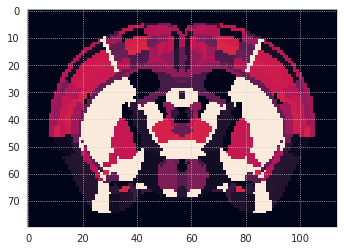

In [70]:
plt.imshow(bg_atlas.annotation[60], vmin=100, vmax=2000)

In [92]:
_ = get_subtree(
    tree = bg_atlas.hierarchy,
    base_id=485,
    n_levels=9,
    show=True,
)

STRd (485)
└── CP (672)
    ├── CPc (2496)
    │   ├── CPc, d (2493)
    │   │   ├── CPc, d, dl (2485)
    │   │   ├── CPc, d, dm (2484)
    │   │   └── CPc, d, vm (2486)
    │   ├── CPc, i (2494)
    │   │   ├── CPc, i, d (2487)
    │   │   ├── CPc, i, vl (2488)
    │   │   └── CPc, i, vm (2489)
    │   └── CPc, v (2490)
    ├── CPce (2495)
    ├── CPi (2492)
    │   ├── CPi, dl (2499)
    │   │   ├── CPi, dl, d (2300)
    │   │   └── CPi, dl, imd (2301)
    │   ├── CPi, dm (2498)
    │   │   ├── CPi, dm, cd (2374)
    │   │   ├── CPi, dm, dl (2299)
    │   │   ├── CPi, dm, dt (2380)
    │   │   └── CPi, dm, im (2298)
    │   ├── CPi, vl (2501)
    │   │   ├── CPi, vl, cvl (2370)
    │   │   ├── CPi, vl, imv (2479)
    │   │   ├── CPi, vl, v (2482)
    │   │   └── CPi, vl, vt (2481)
    │   └── CPi, vm (2500)
    │       ├── CPi, vm, cvm (2483)
    │       ├── CPi, vm, v (2480)
    │       └── CPi, vm, vm (2302)
    ├── CPr (2491)
    │   ├── CPr, imd (2295)
    │   ├── CPr, imv (2296

In [99]:
bg_atlas.structures[2374]

{
    'name': 'Caudoputamen- intermediate, dorsomedial, central dorsal',
    'acronym': 'CPi, dm, cd',
    'id': 2374,
    'structure_id_path': [997, 8, 567, 623, 477, 485, 672, 2492, 2498, 2374],
    'rgb_triplet': [255, 255, 255],
    'mesh_filename': PosixPath('/home/hadi/.brainglobe/kim_mouse_100um_v1.0/meshes/2374.obj'),
    'mesh': <meshio mesh object>
  Number of points: 4296
  Number of cells:
    triangle: 4300
}

In [98]:
bg_atlas.get_structure_descendants(485)

[
    'CP',
    'CPre',
    'CPr',
    'CPr, m',
    'CPr, imd',
    'CPr, imv',
    'CPr, l',
    'CPr, l, ls',
    'CPr, l, vm',
    'CPi',
    'CPi, dm',
    'CPi, dm, dl',
    'CPi, dm, im',
    'CPi, dm, cd',
    'CPi, dm, dt',
    'CPi, vm',
    'CPi, vm, vm',
    'CPi, vm, v',
    'CPi, vm, cvm',
    'CPi, dl',
    'CPi, dl, d',
    'CPi, dl, imd',
    'CPi, vl',
    'CPi, vl, imv',
    'CPi, vl, v',
    'CPi, vl, vt',
    'CPi, vl, cvl',
    'CPc',
    'CPc, d',
    'CPc, d, dm',
    'CPc, d, dl',
    'CPc, d, vm',
    'CPc, i',
    'CPc, i, d',
    'CPc, i, vm',
    'CPc, i, vl',
    'CPc, v',
    'CPce'
]

In [19]:
t = tables['BS']

In [20]:
html = t.get_html_string(
    header=True,
    border=True,
    format=True,
)

In [21]:
html

'<table frame="box" rules="cols">\n    <thead>\n        <tr>\n            <th style="padding-left: 1em; padding-right: 1em; text-align: center">lvl</th>\n            <th style="padding-left: 1em; padding-right: 1em; text-align: center">id</th>\n            <th style="padding-left: 1em; padding-right: 1em; text-align: center">acronym (name)</th>\n            <th style="padding-left: 1em; padding-right: 1em; text-align: center">parent</th>\n            <th style="padding-left: 1em; padding-right: 1em; text-align: center"># vox</th>\n            <th style="padding-left: 1em; padding-right: 1em; text-align: center">sz / cortex</th>\n        </tr>\n    </thead>\n    <tbody>\n        <tr>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">---</td>\n        </tr>\n        <tr>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">2</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">343</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">BS (Brain stem)</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">BS (Basic c...)</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">119632</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">97 %</td>\n        </tr>\n        <tr>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">---</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">---</td>\n        </tr>\n        <tr>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">3</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">1065</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">HB (Hindbrain)</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">HB (Brain stem)</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">47624</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">39 %</td>\n        </tr>\n        <tr>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">3</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: center; vertical-align: top">1129</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: top">IB (Interbrain)</td>\n            <td style="padding-left: 1em; padding-right: 1em; text-align: left; vertical-align: 

In [58]:
mice.cfg.include_regions

[
    'PALd',
    'PALv',
    'PALm',
    'PALc',
    'STRd',
    'STRv',
    'LSX',
    'sAMY',
    'MOB',
    'AOB',
    'AON',
    'TT',
    'DP',
    'PIR',
    'NLOT',
    'COA',
    'PAA',
    'TR',
    'CA',
    'DG',
    'ENTl',
    'ENTm',
    'PAR',
    'POST',
    'PRE',
    'SUB',
    'ProS',
    'HATA',
    'APr',
    'MY-sen',
    'MY-mot',
    'P-sen',
    'P-mot',
    'P-sat',
    'HY',
    'DORsm',
    'DORpm',
    'MBsen',
    'MBmot',
    'MBsta',
    'CBN',
    'VERM',
    'SIM',
    'AN',
    'PRM',
    'COPY',
    'PFL',
    'FL',
    'CTXsp',
    'Isocortex'
]

In [61]:
set(mid_subcortical).symmetric_difference(set(mice.cfg.include_regions))

{
    'SUB',
    'DG',
    'APr',
    'COPY',
    'BLA',
    'EP',
    'CTXsp',
    'FL',
    'PFL',
    'SIM',
    'CLA',
    'VERM',
    'LZ',
    'PRM',
    'HATA',
    'POST',
    'CA',
    'MEZ',
    'Isocortex',
    'HIP',
    'PVZ',
    'AN',
    'PVR',
    'ENTm',
    'RHP',
    'PAR',
    'PRE',
    'CBX',
    'HY',
    'PA',
    'BMA',
    'ENTl',
    'LA',
    'MY-sat',
    'ProS'
}

In [62]:
len(set(mid_subcortical).intersection(set(mice.cfg.include_regions)))

29

In [ ]:
len(set(mid_subcortical).intersection(set(mice.cfg.include_regions)))

In [60]:
mid_subcortical

[
    'STRv',
    'BLA',
    'EP',
    'P-sen',
    'PIR',
    'PALv',
    'LSX',
    'MY-sen',
    'TR',
    'MBsta',
    'CLA',
    'P-sat',
    'DP',
    'MY-mot',
    'DORpm',
    'NLOT',
    'LZ',
    'MEZ',
    'MBmot',
    'CBN',
    'HIP',
    'AOB',
    'AON',
    'PVZ',
    'PALm',
    'DORsm',
    'TT',
    'MOB',
    'PVR',
    'RHP',
    'PAA',
    'sAMY',
    'MBsen',
    'CBX',
    'PA',
    'P-mot',
    'PALc',
    'BMA',
    'STRd',
    'LA',
    'PALd',
    'MY-sat',
    'COA'
]

{
    'ILA',
    'FRP',
    'BLA',
    'EP',
    'PTLp',
    'SS',
    'CLA',
    'RSP',
    'GU',
    'ECT',
    'VIS',
    'PL',
    'LZ',
    'MO',
    'TEa',
    'MEZ',
    'HIP',
    'VISC',
    'PVZ',
    'AI',
    'PVR',
    'RHP',
    'CBX',
    'AUD',
    'PERI',
    'ORB',
    'PA',
    'BMA',
    'LA',
    'MY-sat',
    'ACA'
}

In [17]:
img = nib.load(pjoin(_dir, 'N162_medium_symm_0.2.nii.gz'))
arr = img.get_fdata()
arr.shape, arr.dtype

((60, 46, 81), dtype('float64'))

In [18]:
np.unique(arr)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60., 101., 102., 103., 104., 105.,
       106., 107., 108., 109., 110., 111., 112., 113., 114., 115., 116.,
       117., 118., 119., 120., 121., 122., 123., 124., 125., 126., 127.,
       128., 129., 130., 131., 132., 133., 134., 135., 136., 137., 138.,
       139., 140., 141., 142., 143., 144., 145., 146., 147., 148., 149.,
       150., 151., 152., 153., 154., 155., 156., 157., 158., 159., 160.])

In [15]:
mice.allen['template_info']['sizes']

array([132,  80, 114])

In [16]:
[a / b for a, b in zip(mice.allen['template_info']['sizes'], arr.shape)]

[2.2, 1.7391304347826086, 1.4074074074074074]